<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Lily_Su_sprint4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
import pandas as pd
import numpy as np
pd.options.display.max_rows
credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = [
                     ' A1: b, a.',
                      'A2: continuous.',
                      'A3: continuous.',
                      'A4: u, y, l, t.',
                      'A5: g, p, gg.',
                      'A6:',
                      'A7:',
                      'A8: continuous.',
                      'A9: t, f.',
                      'A10: t, f.',
                      'A11: continuous.',
                      'A12: t, f.',
                      'A13: g, p, s.',
                      'A14: continuous.',
                      'A15: continuous.',
                      'approved'])

In [89]:
credit.head(15)

,"A1: b, a.",A2: continuous.,A3: continuous.,"A4: u, y, l, t.","A5: g, p, gg.",A6:,A7:,A8: continuous.,"A9: t, f.","A10: t, f.",A11: continuous.,"A12: t, f.","A13: g, p, s.",A14: continuous.,A15: continuous.,approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


*    Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).


In [90]:
credit.shape

(690, 16)

In [91]:
credit.dtypes

 A1: b, a.           object
A2: continuous.      object
A3: continuous.     float64
A4: u, y, l, t.      object
A5: g, p, gg.        object
A6:                  object
A7:                  object
A8: continuous.     float64
A9: t, f.            object
A10: t, f.           object
A11: continuous.      int64
A12: t, f.           object
A13: g, p, s.        object
A14: continuous.     object
A15: continuous.      int64
approved             object
dtype: object


*    UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na


In [0]:
credit = credit.replace({0:np.NaN})

In [93]:
credit.isnull().sum()

 A1: b, a.            0
A2: continuous.       0
A3: continuous.      19
A4: u, y, l, t.       0
A5: g, p, gg.         0
A6:                   0
A7:                   0
A8: continuous.      70
A9: t, f.             0
A10: t, f.            0
A11: continuous.    395
A12: t, f.            0
A13: g, p, s.         0
A14: continuous.      0
A15: continuous.    295
approved              0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


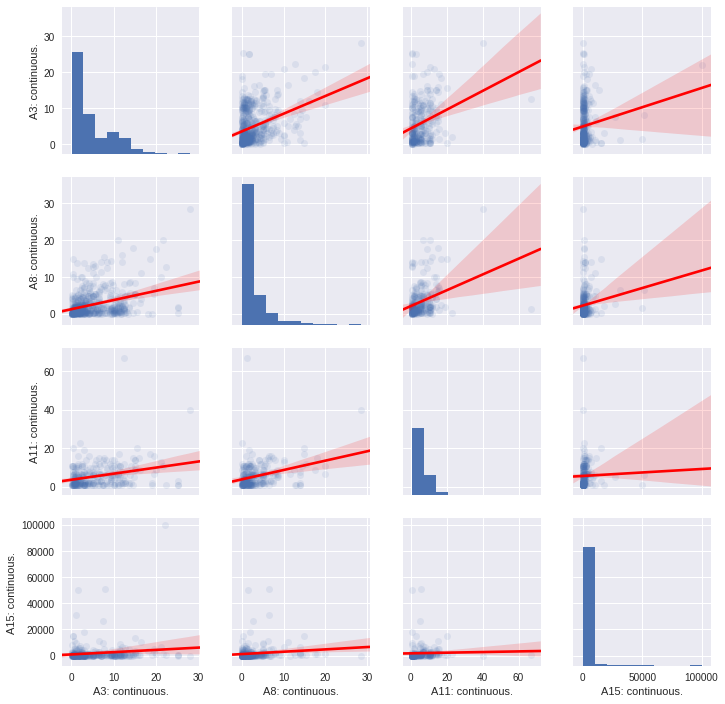

In [95]:
see_credit_rel = sns.pairplot(credit, kind='reg', plot_kws={'line_kws':{'color':'red'},'scatter_kws':{'alpha': 0.1}})

In [105]:
by_A16 = credit.groupby(['approved']).mean()
by_A16
#what does the average look like for all approved and denied loans across all continuous features

,A3: continuous.,A8: continuous.,A11: continuous.,A15: continuous.
approved,,,,
+,6.083289,3.641401,6.765550,3226.443299
-,3.942895,1.455544,2.813953,378.437811


In [0]:
loan_approved = credit[credit.approved =='+']
loan_denied = credit[credit.approved =='-']
#separate loan approved and loan denied into separate dataframes

# t-test #1 on first feature

In [103]:
stats.ttest_ind(loan_approved['A3: continuous.'],credit['A3: continuous.'], nan_policy='omit')

Ttest_indResult(statistic=3.3303278207811164, pvalue=0.0009002398913828809)

The above high value t-statistic shows that having a higher continuous variable in the feature A3 on average increases the likelihood of receiving a loan. This is due to the fact that the average applicant who was approved has a higher A3 continuous value compared to the average of applicants of A3 features who were denied a loan. 

# t-test #2 on second feature

In [104]:
stats.ttest_ind(loan_approved['A11: continuous.'],credit['A11: continuous.'], nan_policy='omit')

Ttest_indResult(statistic=2.0115199618506376, pvalue=0.044804481404700565)

The above t-statistic shows that having a higher continuous variable in the feature A11 on average increases the likelihood of receiving a loan slightly. Compared to having higher A3 features, having A11 features is less significant for approval of a loan. A11 is also less extreme because of a higher p-value.



---



---



For the categorical features, explore by creating "cross tabs" (aka contingency tables) between them and the class label, and apply the Chi-squared test to them. pandas.crosstab can create contingency tables, and scipy.stats.chi2_contingency can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

Our null and alternative hypotheses:

$H_{0}$ : There is *no* statistically significant relationship between chosen categorical feature and approval or denial of loan

$H_{a}$ : There *is* a statistically significant relationship between chosen categorical feature and approval or denial of loan

In [112]:
#feature with more causal relationships to class attributes of attaining credit line
#, margins=True, margins_name="Total"
loan_approval_A10 = pd.crosstab(credit['approved'], credit['A10: t, f.'])
loan_approval_A10

"A10: t, f.",f,t
approved,,
+,98,209
-,297,86


In [113]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(loan_approval_A10)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 143.06956205083145
P-value: 5.675727374527571e-33
Degrees of Freedom: 1
Expected: 
 [[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


In [114]:
# Calculate the p-value from the chi_squared and dof
p_value = stats.chi2.sf(chi_squared, dof)
print(f"P-value: {p_value}")

P-value: 5.675727374527571e-33


Due to the Chi-Squared test and P-value, we reject the null hypothesis that feature A10 and the approval or denial of a loan are independent. If an individual possesses the feature "t" in A10, it increases their chance of denial for a loan.

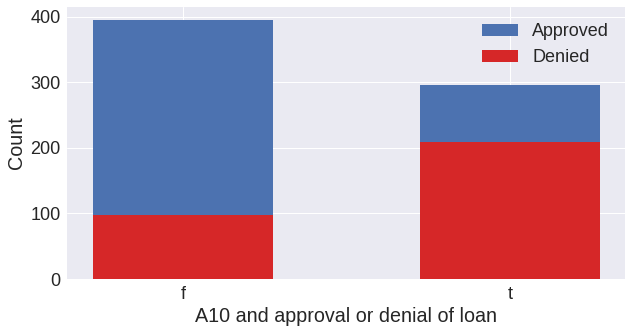

In [111]:
#Assigns the frequency values
app = loan_approval_A10.iloc[0][0:2].values
den = loan_approval_A10.iloc[1][0:2].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["f","t"]
p1 = plt.bar(categories, app, 0.55, color='#d62728')
p2 = plt.bar(categories, den, 0.55, bottom=app)
plt.legend((p2[0], p1[0]), ('Approved', 'Denied'))
plt.xlabel('A10 and approval or denial of loan')
plt.ylabel('Count')
plt.show()

In [115]:
#feature with more causal relationships to class attributes of attaining credit line
#, margins=True, margins_name="Total"
loan_approval_A12 = pd.crosstab(credit['approved'], credit['A12: t, f.'])
loan_approval_A12

"A12: t, f.",f,t
approved,,
+,161,146
-,213,170


In [116]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(loan_approval_A12)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of Freedom: 1
Expected: 
 [[166.40289855 140.59710145]
 [207.59710145 175.40289855]]


In [117]:
p_value = stats.chi2.sf(chi_squared, dof)
print(f"P-value: {p_value}")

P-value: 0.45094587758631943


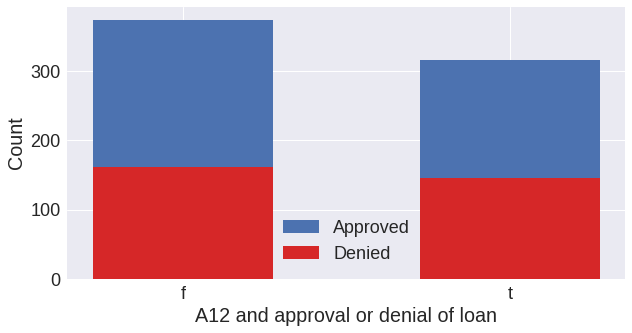

In [119]:
#Assigns the frequency values
app = loan_approval_A12.iloc[0][0:2].values
den = loan_approval_A12.iloc[1][0:2].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["f","t"]
p1 = plt.bar(categories, app, 0.55, color='#d62728')
p2 = plt.bar(categories, den, 0.55, bottom=app)
plt.legend((p2[0], p1[0]), ('Approved', 'Denied'))
plt.xlabel('A12 and approval or denial of loan')
plt.ylabel('Count')
plt.show()

The above shows that feature A12 has less influence over approval or denial of loans than A10, but there are still a proportionally more cases of denial approval of loan than denial especially if one possesses feature 'f' for A12.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?

*   Possessing feature A3 is more impactful regarding a approval of a loan than A11, which is more neutral.

Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?

*   Possessing feature "t" in A10 increases the chance that one is to be denied from a loan. There is less correlation for features in A12, but having feature "f" in A12 increases one's likelihood to receive a loan.


What was the most challenging part of this sprint challenge?

*   Understanding what would be a reasonable null-hypothesis given the data parameters, specifically whether to interpret that there is an average approval proportion that should be the null hypothesis or to interpret that one should be approved for a loan by default, or if one has a 50/50 chance to garner approval for a loan.